In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

### Measurement of relationship for different label(target) and Feature types 
| Label Data Type | Feature data type | Effect size stat    | Visualization |
|-----------------|-------------------|---------------------|---------------|
| numeric         | numeric           | Pearson co-relation | Scatterplot   |
| numeric         | Categorical       | One way ANOVA       | Bar chart     |
| categorical     | categorical       | Pearson chi-square  | cross tab     |

### For pearson corelation following conditions should be met: 
1. Data should be continuous
1. Linear Relationship (slope of the line is constant )
1. Homoskedasticity (Error expands ot contracts linearly)

If the above assumption does not hold true use **Kendell**  or **Spearsmans** corelation 

In [10]:
height = [60,62,65,68,70,74]
weight = [140,138,150,164,190,250]

In [11]:
np.corrcoef(height,weight)

array([[1.        , 0.92574107],
       [0.92574107, 1.        ]])

In [12]:
np.corrcoef(height,weight)[0][1]

0.9257410705402925

In [55]:
df = pd.read_csv("insurance.csv", index_col=None)

### Run df.corr() and it will automate corelation co efficient generation for all the *numeric* values in the dataframe

In [14]:
df.corr()

,Unnamed: 0,age,bmi,children,charges
Unnamed: 0,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

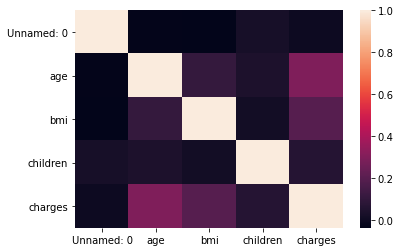

In [17]:
sns.heatmap(df.corr())

### Corelation between 2 numeric variables

In [18]:
df.age.corr(df.bmi)

0.1092718815485352

### Using scipy package to get corelation and p vales

In [29]:
from scipy import stats
r, p = stats.pearsonr(df.charges, df.age)
print("Corelation:",r)
print("p-value:",p)

### rounding off the r and p values 
print("Rounded Corelation:",round(r,4))
print("Rounded p-value:",round(p,29))

Corelation: 0.29900819333064765
p-value: 4.8866933317203816e-29
Rounded Corelation: 0.299
Rounded p-value: 5.0000000000000004e-29


### the p value for above data is very low, so it is highly **likely** that we will see the same co-relation(.299) if we pick another sample from population

In [26]:
coff_df = pd.DataFrame(columns=['r','p'])

In [56]:
df = pd.read_csv("insurance.csv", index_col=None)

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [60]:
### The reason below code will fail is because we are trying to get correlation for non numeric data in df( sex, smoker, region).
### we have to bypass it
for col in df.columns:
    r, p = stats.pearsonr(df.charges,df[col])
    print(f" Feature:{col}, r:{r} , p-value:{p}" )
    

 Feature:age, r:0.29900819333064765 , p-value:4.8866933317203816e-29


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [70]:
corr_df = pd.DataFrame(columns=['r','p'])
for col in df.columns:
    #print(col)
    if pd.api.types.is_numeric_dtype(df[col]):
        r, p = stats.pearsonr(df.charges,df[col])
        print(f" Target_var: Charges, Featurename:{col}, r:{r} , p-value:{p}")
        corr_df.loc[col] = [round(r,3), round(p, 3)]

 Target_var: Charges, Featurename:age, r:0.29900819333064765 , p-value:4.8866933317203816e-29
 Target_var: Charges, Featurename:bmi, r:0.1983409688336289 , p-value:2.459085535117846e-13
 Target_var: Charges, Featurename:children, r:0.06799822684790481 , p-value:0.012852128520141125
 Target_var: Charges, Featurename:charges, r:1.0 , p-value:0.0


In [71]:
corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013
charges,1.000,0.000
